In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import*
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore','.*SettingWithCopyWarning*')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
from scipy.stats import pearsonr
from subprocess import check_output
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data=pd.read_csv('/content/GlobalTemperatures.csv')

In [3]:
data.shape

(3192, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [5]:
import pandas as pd

# Assuming your DataFrame is called 'data'
for column in data.columns:
    if data[column].isnull().any():  # Check if column has null values
        data[column] = data[column].fillna(data[column].mean())

# Print info to verify
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3192 non-null   float64
 2   LandAverageTemperatureUncertainty          3192 non-null   float64
 3   LandMaxTemperature                         3192 non-null   float64
 4   LandMaxTemperatureUncertainty              3192 non-null   float64
 5   LandMinTemperature                         3192 non-null   float64
 6   LandMinTemperatureUncertainty              3192 non-null   float64
 7   LandAndOceanAverageTemperature             3192 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  3192 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


<Axes: >

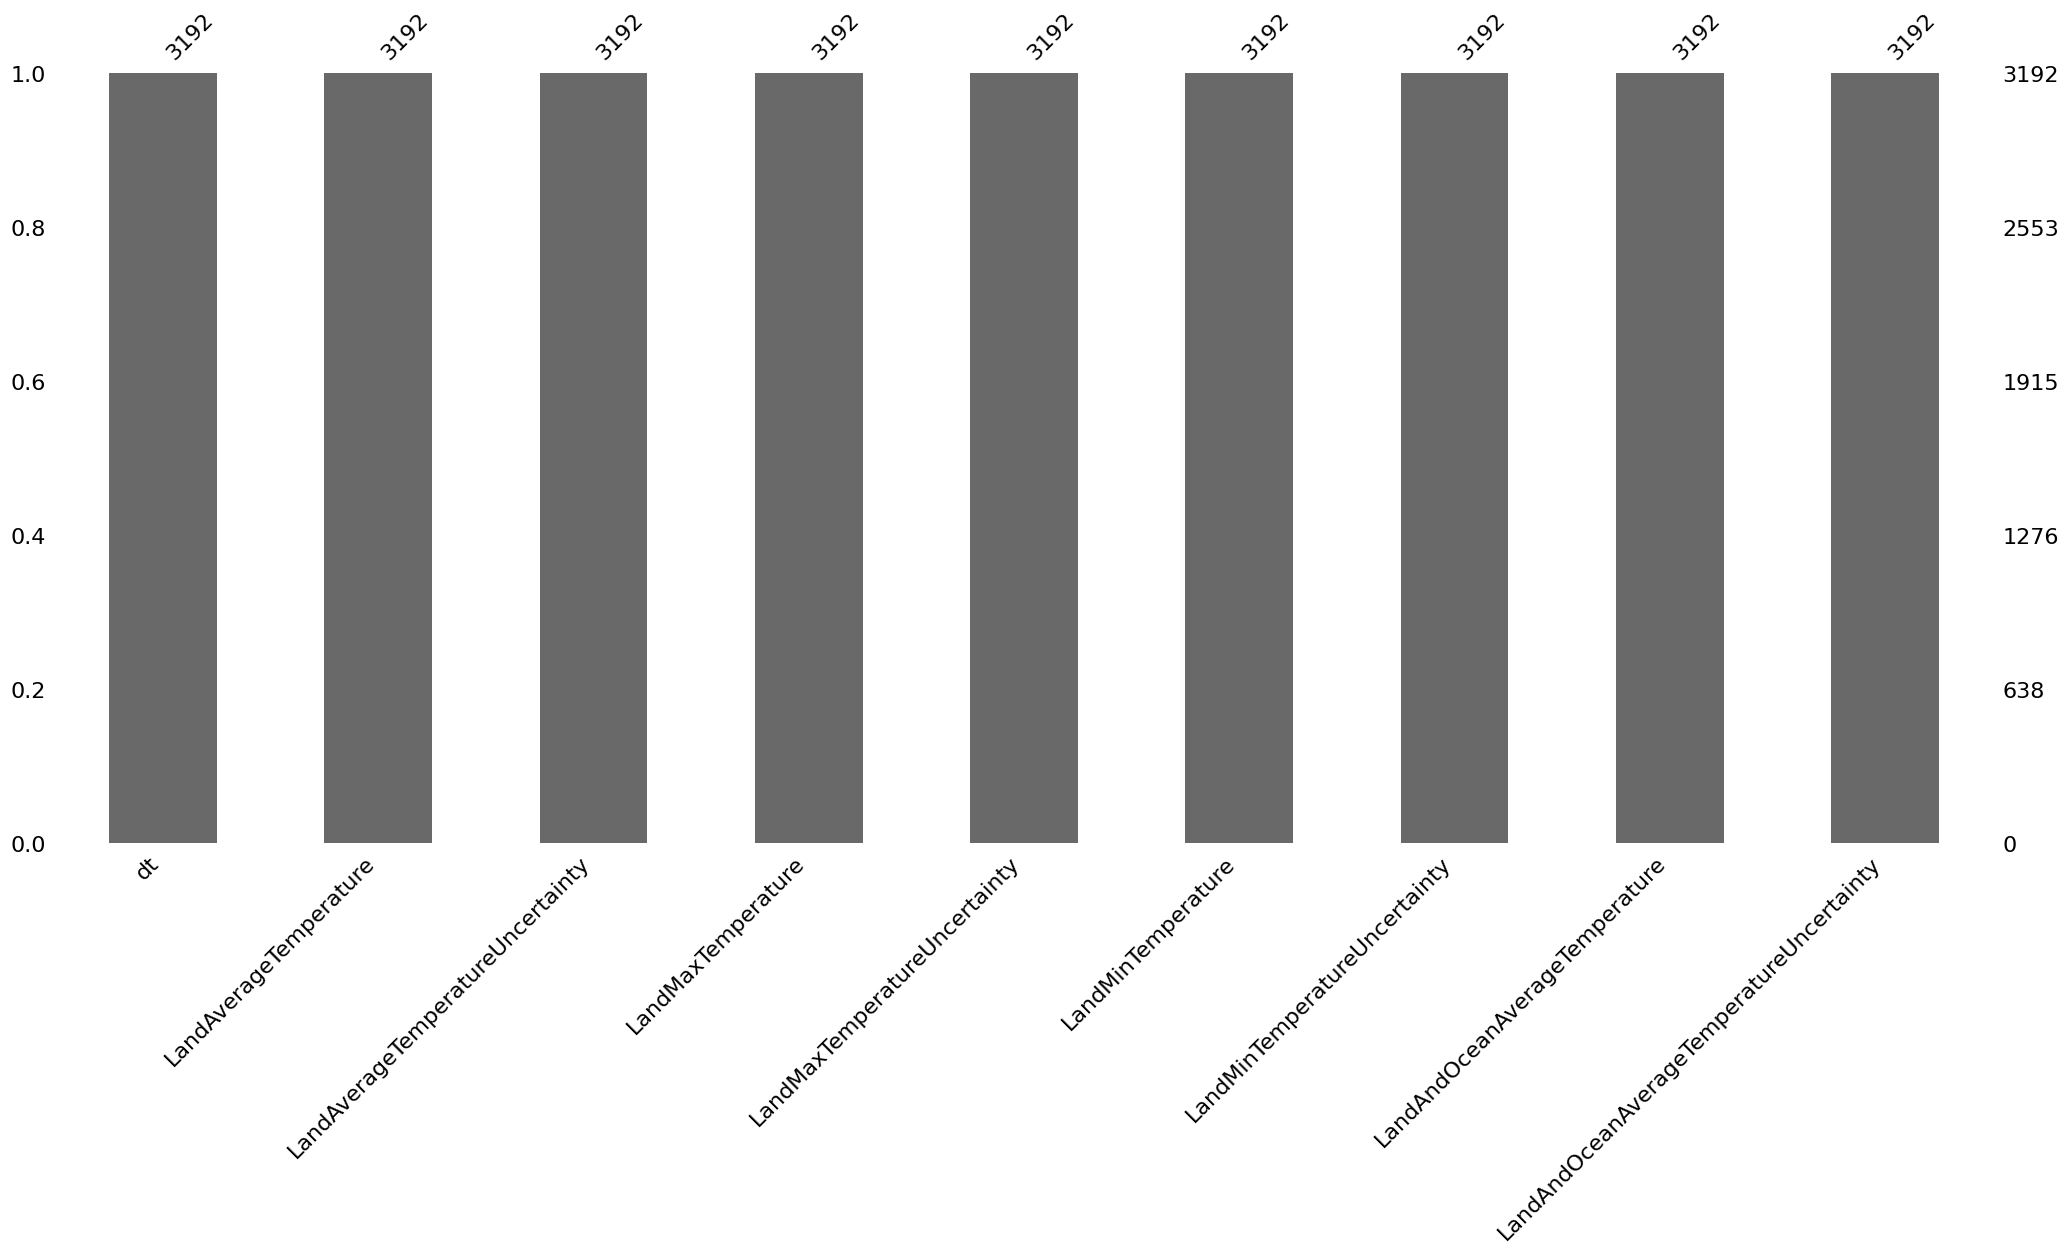

In [6]:
def perc_null(x=str):
  percentage = (data[x].isnull().sum()*100)/len(data.index)
  return percentage

for i in data.columns:
  print(perc_null(i))

import missingno as msno
msno.bar(data)

In [7]:
data.isnull()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3187,False,False,False,False,False,False,False,False,False
3188,False,False,False,False,False,False,False,False,False
3189,False,False,False,False,False,False,False,False,False
3190,False,False,False,False,False,False,False,False,False


In [8]:
data.duplicated().sum()

0

In [9]:
df=data[['dt','LandAverageTemperature']]

In [10]:
data['year']=data['dt'].apply(lambda x:x[:4])

In [11]:
data.dropna(inplace=True)

In [12]:
data['dt']=pd.to_datetime(data['dt'])

In [13]:
data.index=data['dt']

In [14]:
data['month']=data.index.month
data['year']=data.index.year
pivot=pd.pivot_table(data, values='LandAverageTemperature', index='month', columns='year', aggfunc='mean')

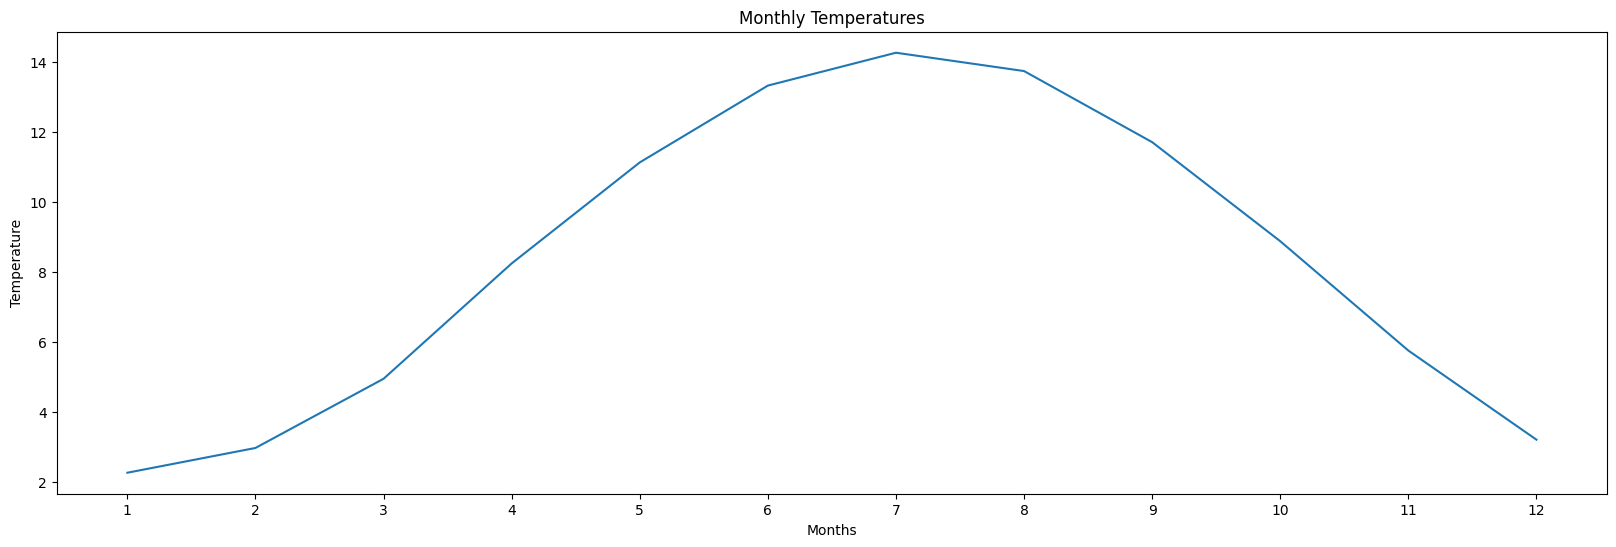

In [15]:
monthly_seasonality=pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

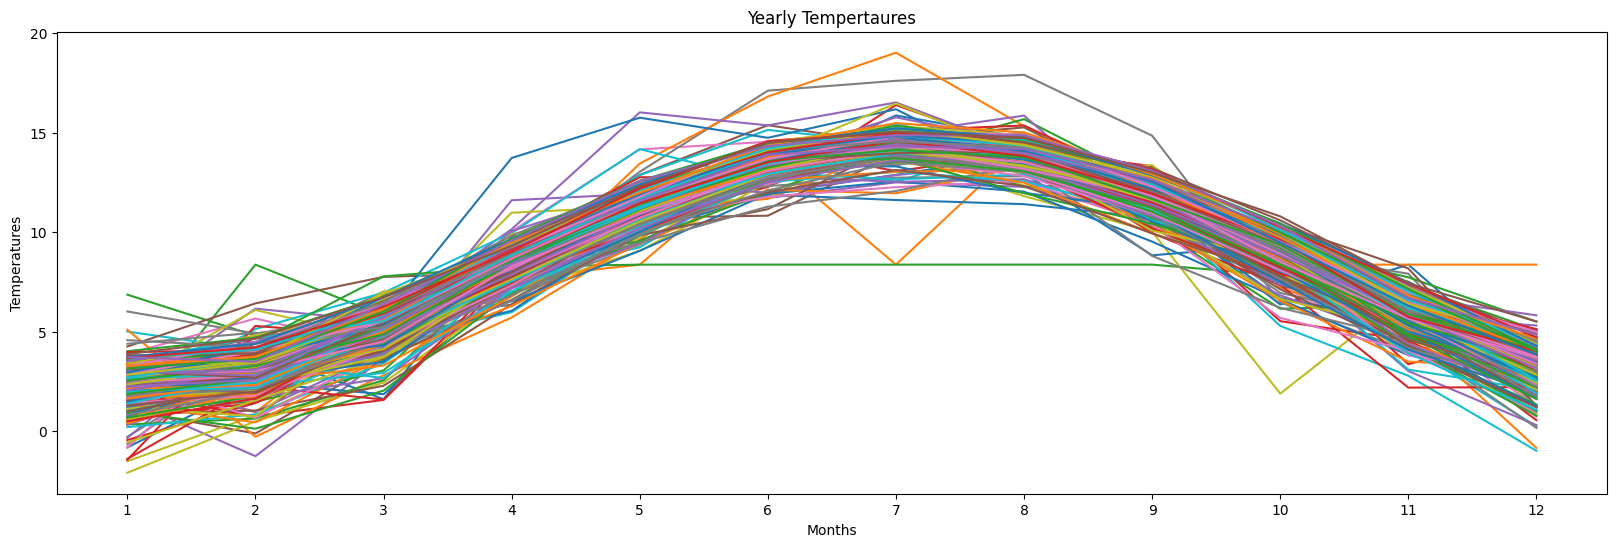

In [16]:
data['month']=data.index.month
data['year']=data.index.year
pivot=pd.pivot_table(data, values='LandAverageTemperature', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Yearly Tempertaures')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

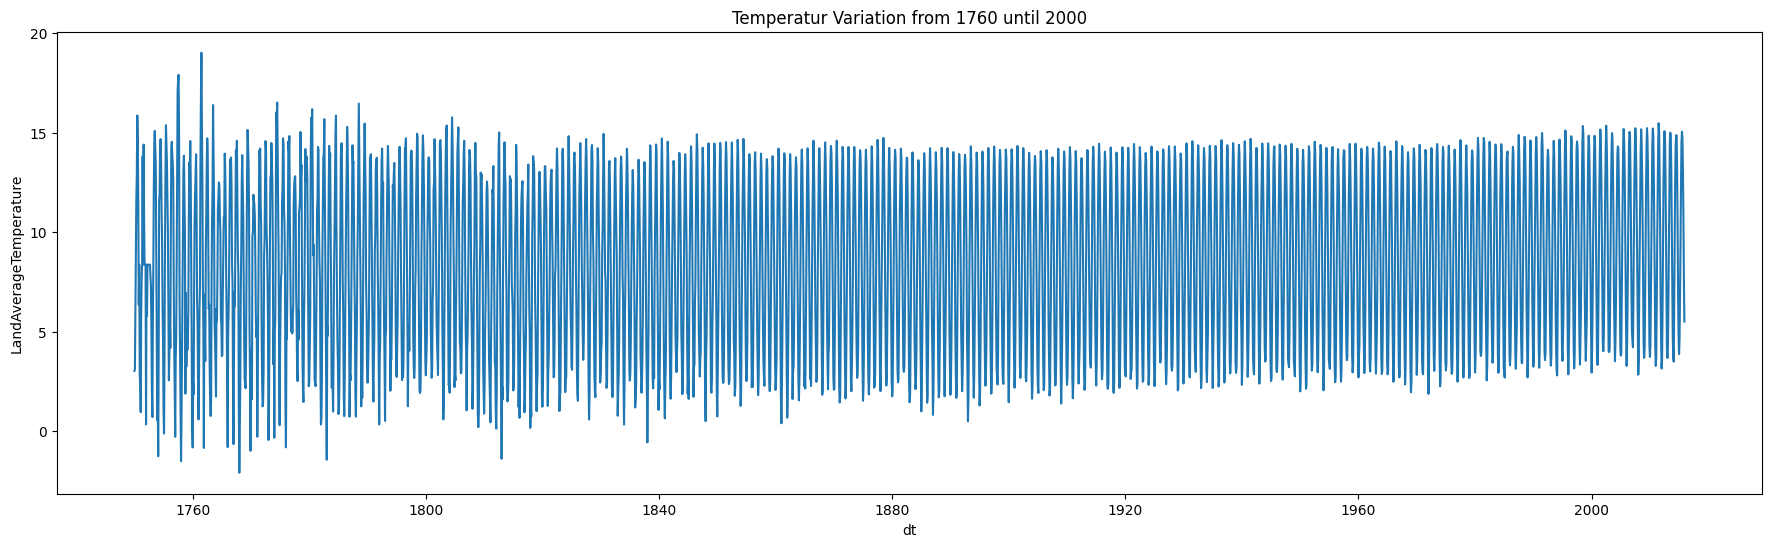

In [17]:
plt.figure(figsize=(22,6))
sns.lineplot(x=data.index, y=data['LandAverageTemperature'])
plt.title('Temperatur Variation from 1760 until 2000')
plt.show()

In [18]:
data.describe()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
count,3192,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000
mean,1882-12-15 23:02:15.338345984,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532,1882.500000,6.500000
min,1750-01-01 00:00:00,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000,1750.000000,1.000000
25%,1816-06-23 12:00:00,4.327750,0.187000,12.266000,0.206750,0.959500,0.231000,14.765500,0.108000,1816.000000,3.750000
50%,1882-12-16 12:00:00,8.584500,0.394500,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532,1882.500000,6.500000
75%,1949-06-08 12:00:00,12.538750,1.413250,16.749000,0.479782,4.669000,0.431849,15.819500,0.131000,1949.000000,9.250000
max,2015-12-01 00:00:00,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000,2015.000000,12.000000
std,NaN,4.373064,1.094376,3.404137,0.460672,3.282695,0.352167,1.006406,0.058126,76.799074,3.452593


<ipython-input-19-da831bcda6ff>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




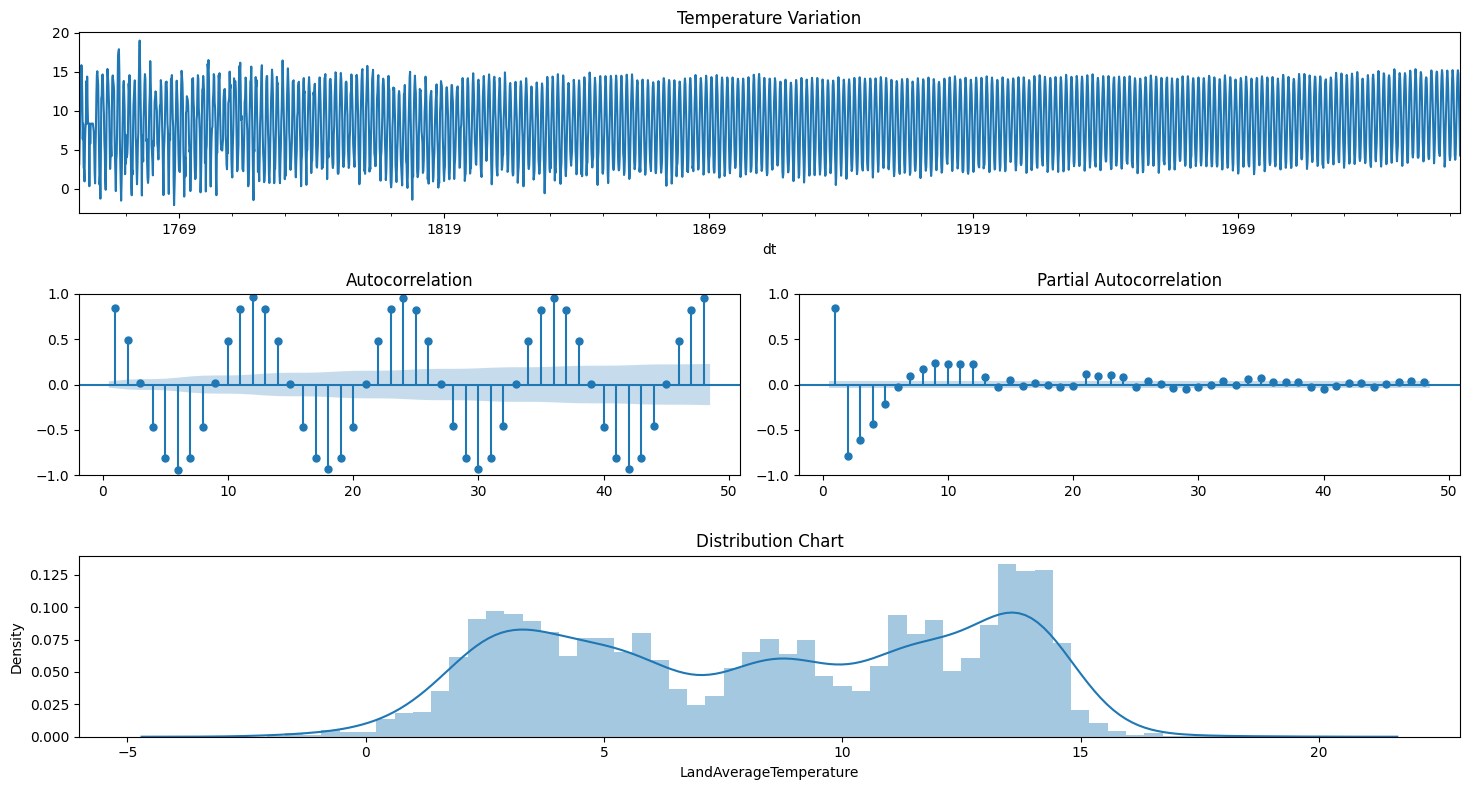

In [19]:
train = data[:-60].copy()
y = train['LandAverageTemperature']
lags_plots=48
figsize=(22,8)
y = pd.Series(y)
fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (1, 0))
ax3 = plt.subplot2grid((3, 3), (1, 1))
ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
y.plot(ax=ax1, figsize=figsize)
ax1.set_title('Temperature Variation')
plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
ax4.set_title('Distribution Chart')
plt.tight_layout()

In [20]:
print('Results of Dickey-Fuller Test:')
adfinput = adfuller(y)
adftest = pd.Series (adfinput[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
adftest = round(adftest, 4)
for key, value in adfinput[4].items():
  adftest["Critical Value (%s)"%key] = value.round(4)
print(adftest)

if adftest[0].round(2) < adftest[5].round(2):
   print('\nThe Test Statistics is lower than the Critical Value of 5%. \nThe serie seems to be stationary')

else:
  print("\nThe Test Statistics is higher than the Critical Value of 5%. \nThe serie isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                   -4.3013
p-value                           0.0004
Lags Used                        29.0000
Number of Observations Used    3102.0000
Critical Value (1%)              -3.4325
Critical Value (5%)              -2.8625
Critical Value (10%)             -2.5673
dtype: float64

The Test Statistics is lower than the Critical Value of 5%. 
The serie seems to be stationary


<ipython-input-20-09b3d242bd8a>:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [21]:
X = data.drop('LandAverageTemperature', axis =1)
y = data['LandAverageTemperature']

In [22]:
X['dt'] = pd.to_datetime(X['dt']).view(int) / 10**9
# Now convert X to a NumPy array
x = X.to_numpy().astype(float)
y = y.to_numpy()
y = y.reshape(-1, 1)

# Train-test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

<ipython-input-22-06e75ad03939>:1: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
model = Sequential()
model.add(Input(shape=(xtrain.shape[1], 1)))  # Define input shape here
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=5)

Epoch 1/5
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - loss: 10.5676
Epoch 2/5
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 1.3284
Epoch 3/5
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 1.1253
Epoch 4/5
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 1.0499
Epoch 5/5
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.9704


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


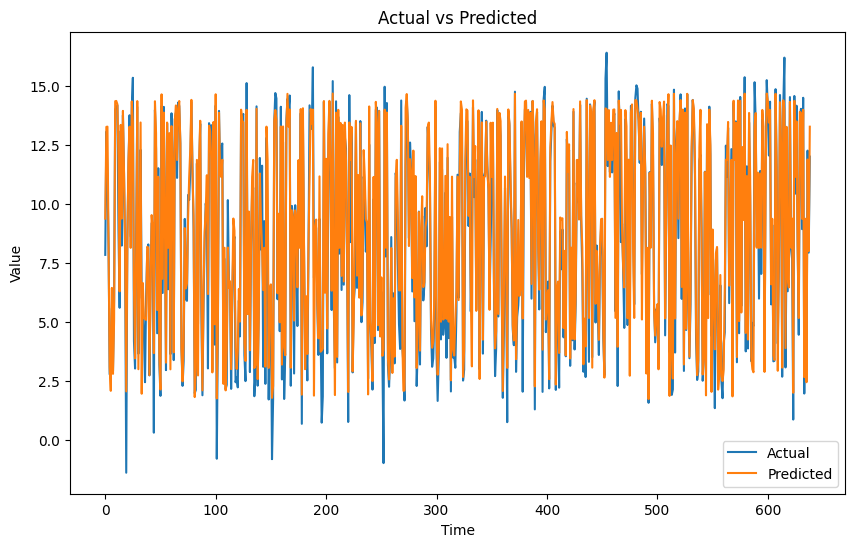

In [25]:
import matplotlib.pyplot as plt
predictions = model.predict(xtest)
plt.figure(figsize=(10, 6))
plt.plot(ytest, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


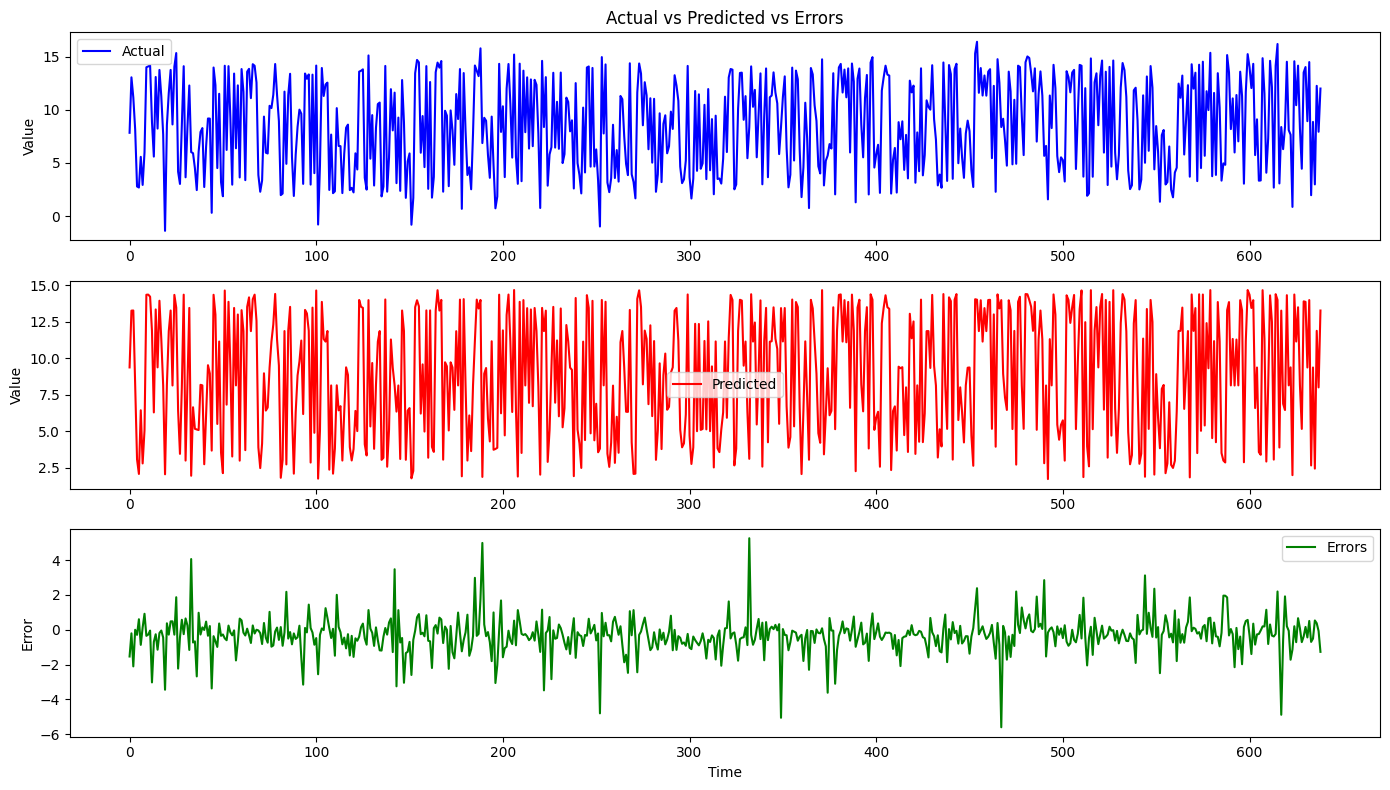

In [26]:
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(xtest)
errors = ytest - predictions
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(ytest, label='Actual', color='blue')
plt.title('Actual vs Predicted vs Errors')
plt.ylabel('Value')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(predictions, label='Predicted', color='red')
plt.ylabel('Value')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(errors, label='Errors', color='green')
plt.ylabel('Error')
plt.xlabel('Time')
plt.legend()
plt.tight_layout()
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


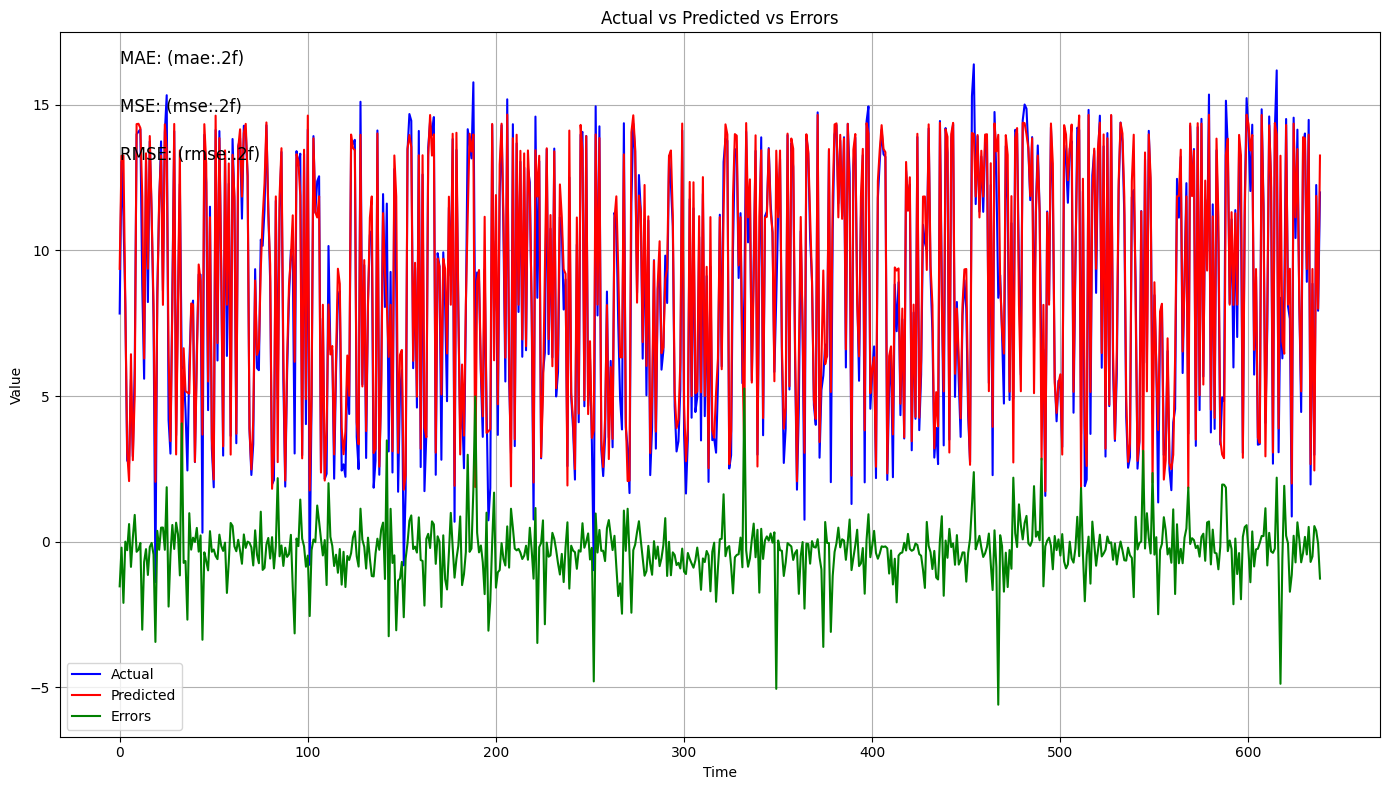

In [27]:
import matplotlib.pyplot as pit
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
predictions = model.predict(xtest)
errors = ytest - predictions
mae = mean_absolute_error(ytest, predictions)
mse = mean_squared_error(ytest, predictions)
rmse = np.sqrt(mse)
plt.figure(figsize=(14, 8))
plt.plot(ytest, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.plot(errors, label='Errors', color='green')
plt.text(0, np.max(ytest), f"MAE: (mae:.2f)", fontsize=12, color='black')
plt.text(0, np.max(ytest)*0.9, f"MSE: (mse:.2f)", fontsize=12,color='black')
plt.text(0, np.max(ytest)*0.8, f"RMSE: (rmse:.2f)", fontsize=12, color="black")
plt.title('Actual vs Predicted vs Errors')
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
import joblib
classifier = joblib.dump(model, 'model.pkl')